In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [163]:
#loading data
cus=pd.read_excel("C:/Users/use/Desktop/Womens Clothing Reviews Data.xlsx",sheet_name="Woman Clothing Reviews")

In [164]:
cus.isna().sum()
#there are null values
cus.duplicated().sum()
#3 duplicated row 

np.int64(3)

In [165]:
#removing duplicated row
cus=cus.drop_duplicates()

In [166]:
#merging column review title and review text
cus["Review Title"]=cus["Review Title"].fillna(" ")
cus["Review Text"]=cus["Review Text"].fillna(" ")
cus["review"]=cus["Review Title"]+" "+cus["Review Text"]

In [36]:
#EDA

In [39]:
cus.describe().T
#The avergae rating we get is 4.19 somajority of people like our dress

,count,mean,std,min,25%,50%,75%,max
Product ID,23483.0,918.127369,203.310444,0.0,861.0,936.0,1078.0,1205.0
Customer Age,23483.0,43.199165,12.280051,18.0,34.0,41.0,52.0,99.0
Rating,23483.0,4.195929,1.110064,1.0,4.0,5.0,5.0,5.0
Recommend Flag,23483.0,0.822340,0.382235,0.0,1.0,1.0,1.0,1.0


In [41]:
cus.describe(include=object).T
#The most sold category is General
#the most sold sub category is Tops
#The most sold sub category is Dresses
#the most order we get is from web
#the most ordered location is gurgaon

,count,unique,top,freq
Category,23469,3,General,13849
Subcategory1,23469,6,Tops,10465
SubCategory2,23469,20,Dresses,6319
Location,23483,4,Gurgaon,8818
Channel,23483,2,Web,13580
Review Title,23483,13994,,3807
Review Text,23483,22635,,842
review,23483,22638,,841


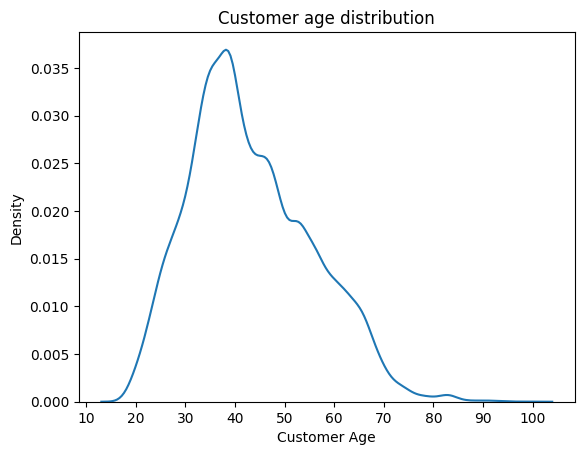

In [47]:
sns.kdeplot(cus["Customer Age"],)
plt.xticks(np.arange(10,101,10))
plt.title("Customer age distribution")
plt.show()
#maximum customer are from the age 30 to 40

In [ ]:
customer age analysis

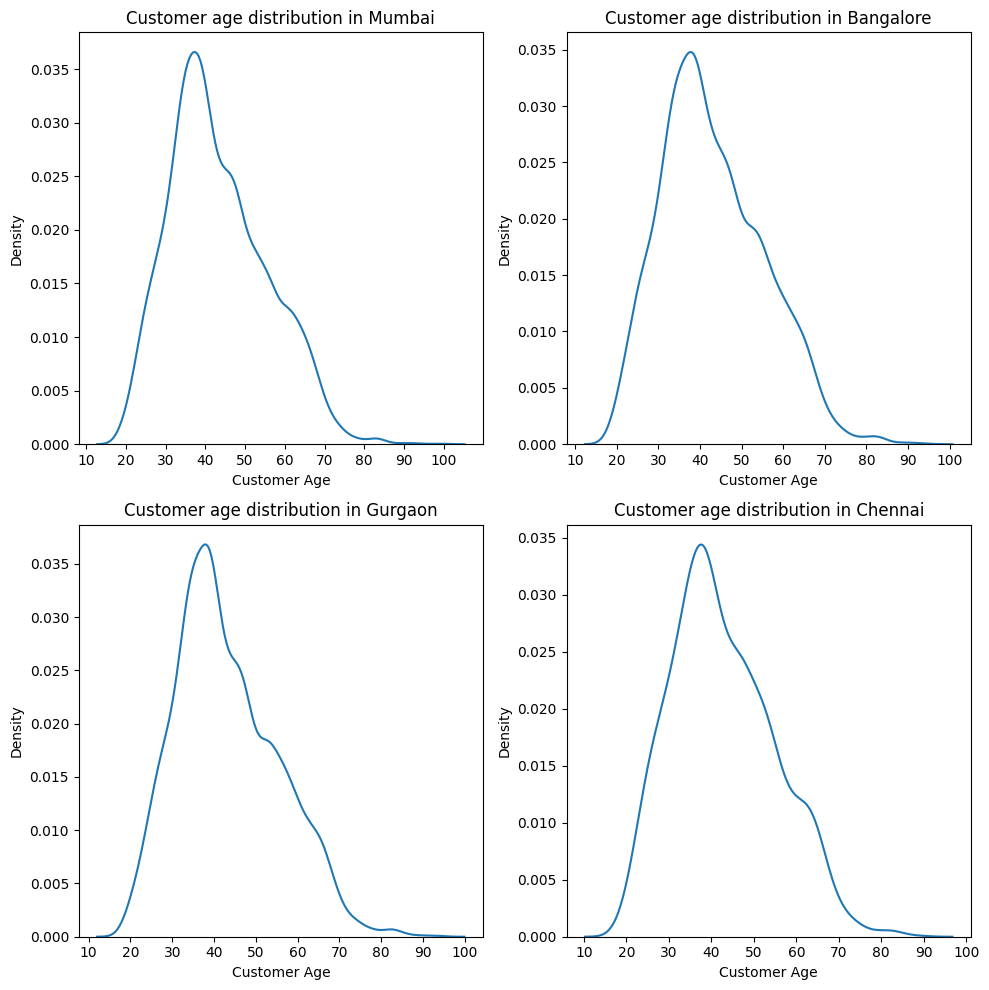

In [53]:
#customer distribution in each location 
loc=list(cus["Location"].unique())
c=1
plt.figure(figsize=(10,10))
for i in loc:
    plt.subplot(2,2,c)
    age=cus[cus["Location"]==i]
    sns.kdeplot(age["Customer Age"])
    plt.xticks(np.arange(10,101,10))
    plt.title(f"Customer age distribution in {i}")
    c=c+1
plt.tight_layout()
plt.show()
#in all places the age distribution is kind of same

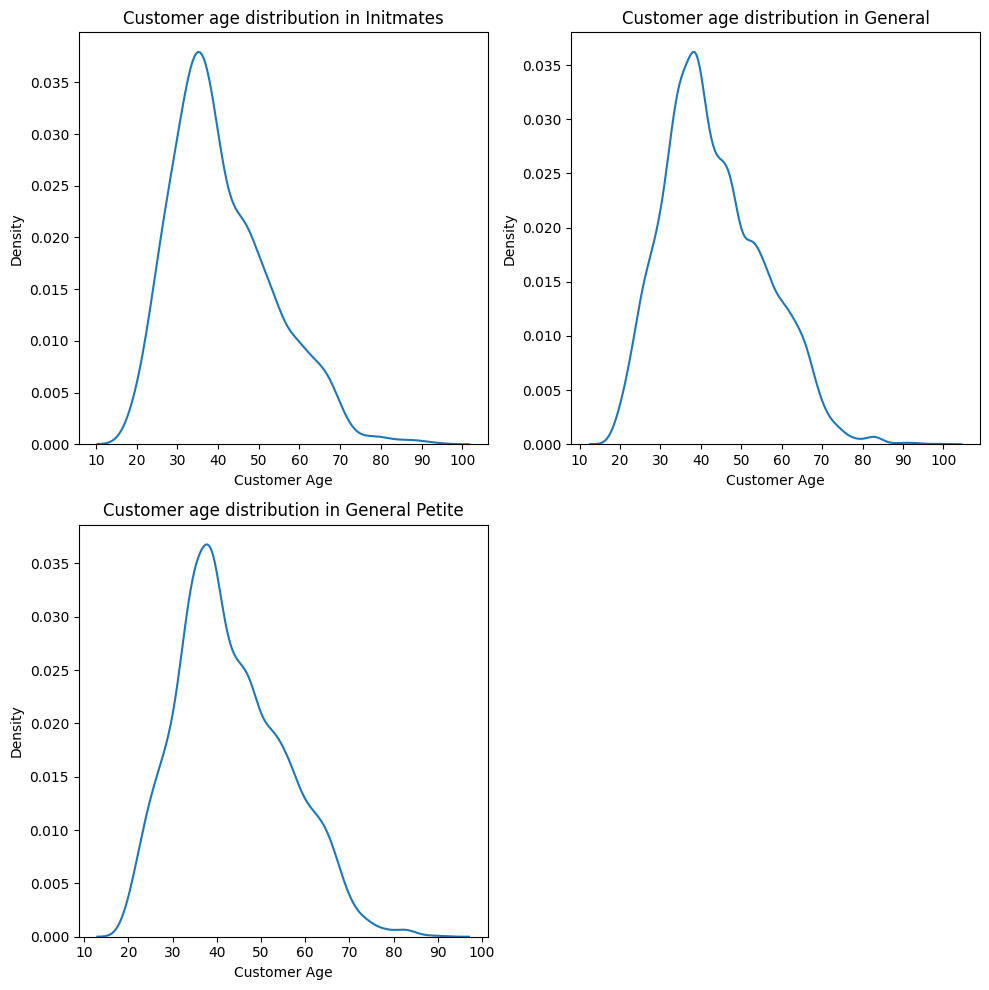

In [56]:
#analyse by category
loc=list(cus["Category"].unique())
loc=loc[0:3]
c=1
plt.figure(figsize=(10,10))
for i in loc:
    plt.subplot(2,2,c)
    age=cus[cus["Category"]==i]
    sns.kdeplot(age["Customer Age"])
    plt.xticks(np.arange(10,101,10))
    plt.title(f"Customer age distribution in {i}")
    c=c+1
plt.tight_layout()
plt.show()
#in all places the age distribution is kind of same

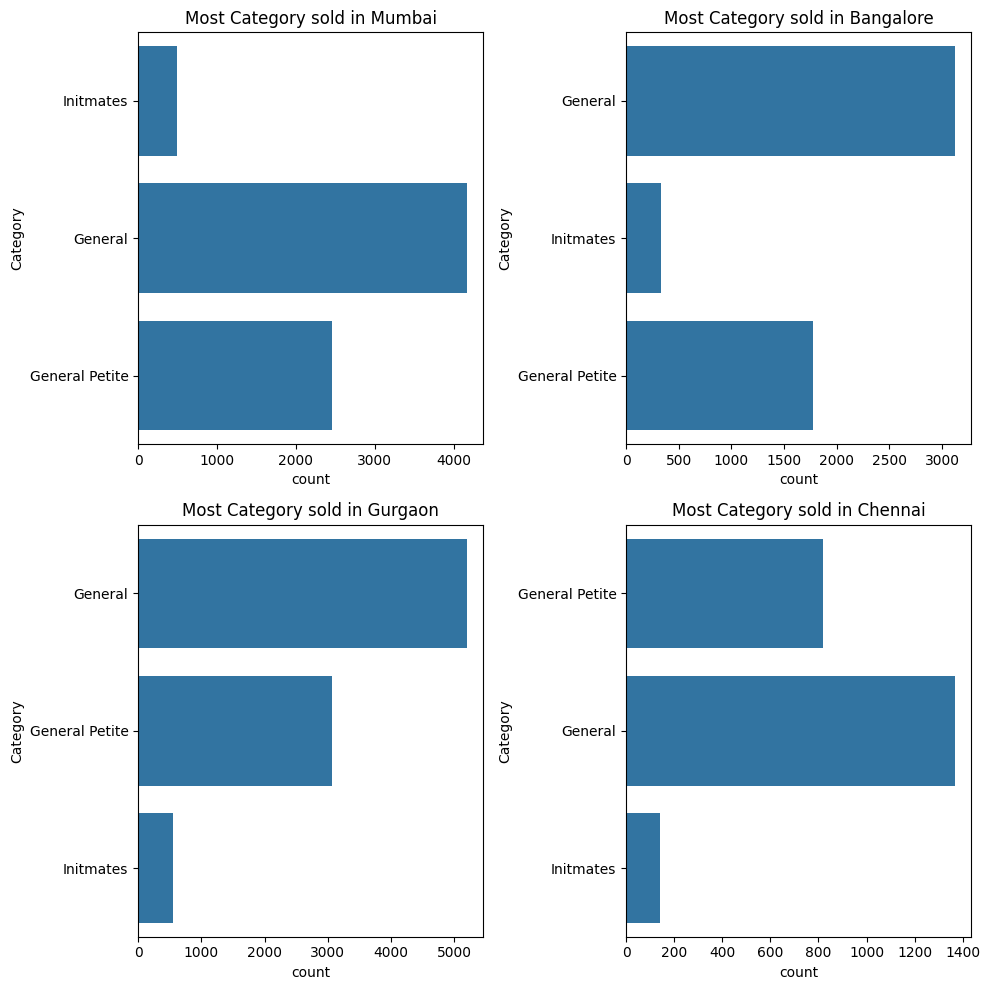

In [60]:
loc=list(cus["Location"].unique())
c=1
plt.figure(figsize=(10,10))
for i in loc:
    plt.subplot(2,2,c)
    age=cus[cus["Location"]==i]
    sns.countplot(age["Category"])
    plt.title(f"Most Category sold in {i}")
    c=c+1
plt.tight_layout()
plt.show()
#intimate is the most less sold cateory sold in all location
#General is the most sold category in all location

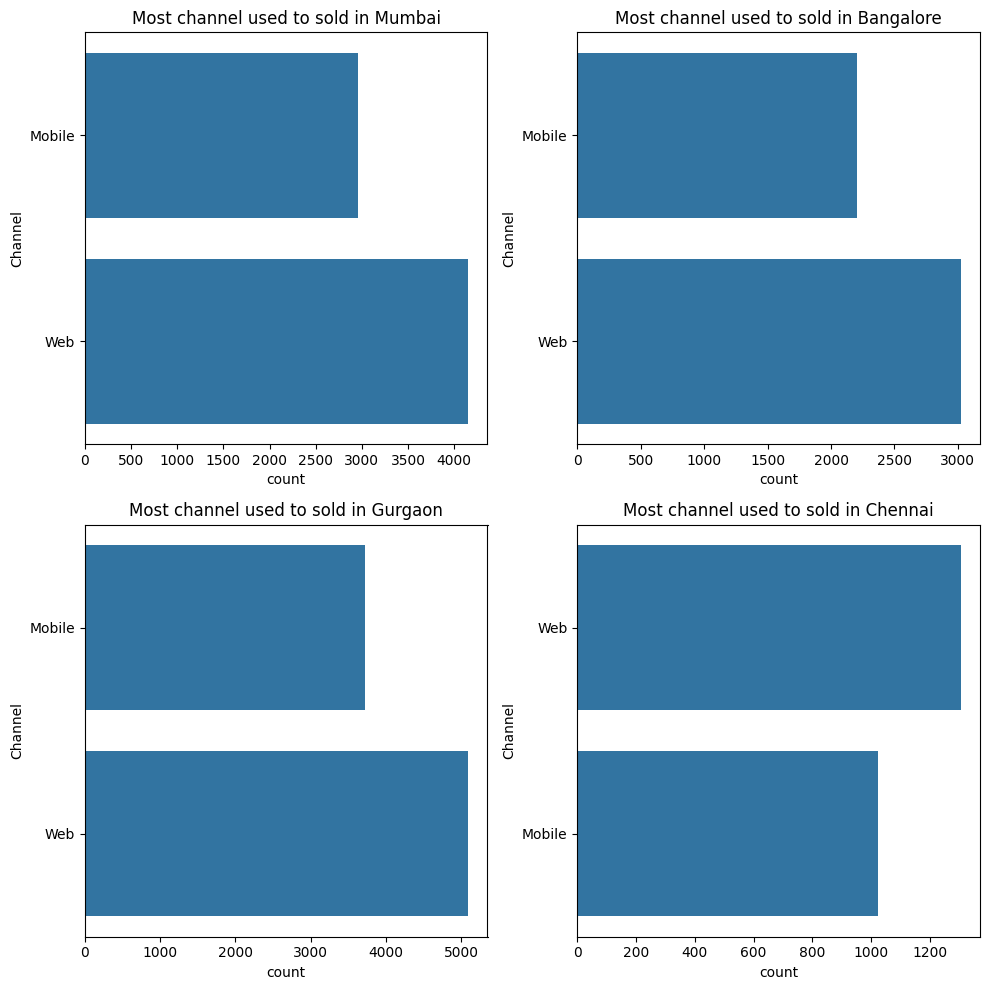

In [63]:
loc=list(cus["Location"].unique())
c=1
plt.figure(figsize=(10,10))
for i in loc:
    plt.subplot(2,2,c)
    age=cus[cus["Location"]==i]
    sns.countplot(age["Channel"])
    plt.title(f"Most channel used to sold in {i}")
    c=c+1
plt.tight_layout()
plt.show()
#Web is the most used channel in all

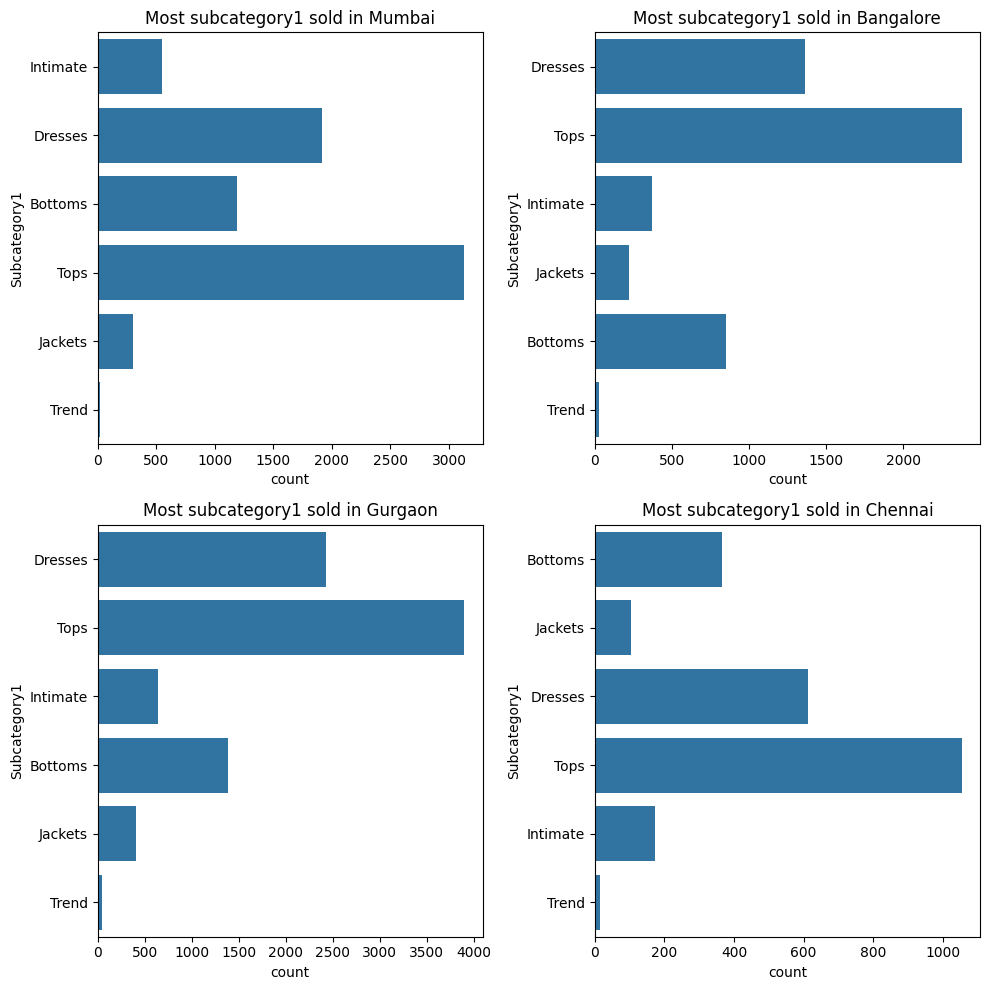

In [66]:
loc=list(cus["Location"].unique())
c=1
plt.figure(figsize=(10,10))
for i in loc:
    plt.subplot(2,2,c)
    age=cus[cus["Location"]==i]
    sns.countplot(age["Subcategory1"])
    plt.title(f"Most subcategory1 sold in {i}")
    c=c+1
plt.tight_layout()
plt.show()
#tops are the most sold sub category 1 in all location 
#Trend are the least sold sub category 1 in all location 

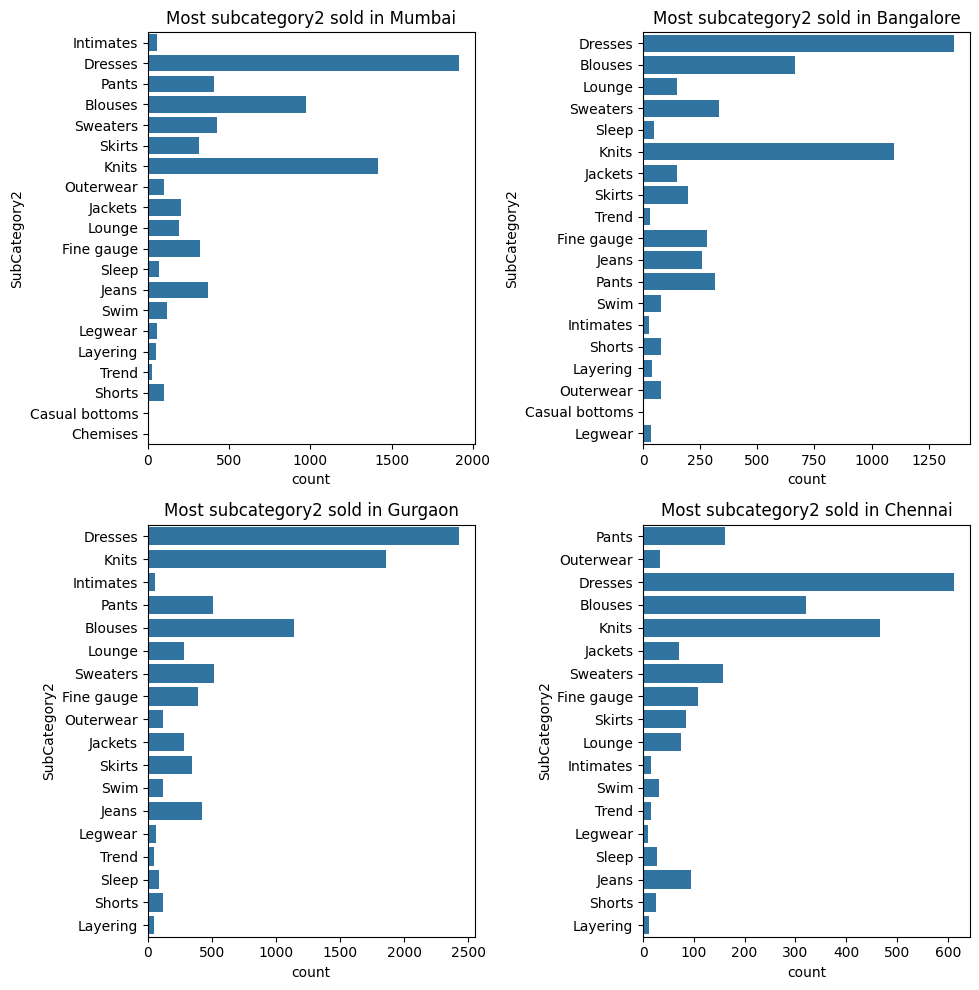

In [69]:
loc=list(cus["Location"].unique())
c=1
plt.figure(figsize=(10,10))
for i in loc:
    plt.subplot(2,2,c)
    age=cus[cus["Location"]==i]
    sns.countplot(age["SubCategory2"])
    plt.title(f"Most subcategory2 sold in {i}")
    c=c+1
plt.tight_layout()
plt.show()
#Dresses are the most sold sub category 1 in all location 

In [78]:
cus.groupby(["Subcategory1","SubCategory2"])["SubCategory2"].count()
#in bottoms pants ares the most sold item
#in Dresses dresses are most sold
#In intimate Lounge is the most sold
#in jackets Jackets are most sold
# in Tops Knits are most sold

Subcategory1  SubCategory2  
Bottoms       Casual bottoms       2
              Jeans             1147
              Pants             1388
              Shorts             317
              Skirts             945
Dresses       Dresses           6319
Intimate      Chemises             1
              Intimates          154
              Layering           146
              Legwear            165
              Lounge             691
              Sleep              228
              Swim               350
Jackets       Jackets            704
              Outerwear          328
Tops          Blouses           3096
              Fine gauge        1100
              Knits             4841
              Sweaters          1428
Trend         Trend              119
Name: SubCategory2, dtype: int64

In [81]:
for i in loc:
    cat=cus[cus["Location"]==i]
    print(f"In {i}")
    print(cat.groupby(["Subcategory1","SubCategory2"])["SubCategory2"].count())
#The highest sold in similar for all

In Mumbai
Subcategory1  SubCategory2  
Bottoms       Casual bottoms       1
              Jeans              369
              Pants              405
              Shorts              98
              Skirts             316
Dresses       Dresses           1916
Intimate      Chemises             1
              Intimates           58
              Layering            52
              Legwear             57
              Lounge             190
              Sleep               71
              Swim               120
Jackets       Jackets            202
              Outerwear           97
Tops          Blouses            973
              Fine gauge         320
              Knits             1415
              Sweaters           424
Trend         Trend               24
Name: SubCategory2, dtype: int64
In Bangalore
Subcategory1  SubCategory2  
Bottoms       Casual bottoms       1
              Jeans              259
              Pants              317
              Shorts              8

In [93]:
print(cus.groupby("Category")["Rating"].mean())
#All category have a average rating of 4

Category
General           4.176547
General Petite    4.210889
Initmates         4.286285
Name: Rating, dtype: float64


In [95]:
print(cus.groupby("Subcategory1")["Rating"].mean())
#Most subcaegory 1 have a average rating of 4 but trend have a avergae rating of 3

Subcategory1
Bottoms     4.288760
Dresses     4.150815
Intimate    4.280115
Jackets     4.264535
Tops        4.172002
Trend       3.815126
Name: Rating, dtype: float64


In [98]:
print(cus.groupby("SubCategory2")["Rating"].mean())
#Most subcaegory 2 have a average rating of 4 but trend have a avergae rating of 3

SubCategory2
Blouses           4.153747
Casual bottoms    4.500000
Chemises          4.000000
Dresses           4.150815
Fine gauge        4.260909
Intimates         4.279221
Jackets           4.295455
Jeans             4.360942
Knits             4.161330
Layering          4.376712
Legwear           4.278788
Lounge            4.301013
Outerwear         4.198171
Pants             4.265850
Shorts            4.255521
Skirts            4.245503
Sleep             4.285088
Sweaters          4.179272
Swim              4.197143
Trend             3.815126
Name: Rating, dtype: float64


In [100]:
print(cus.groupby("Location")["Rating"].mean())
#All location gives a average rating of 4

Location
Bangalore    4.187979
Chennai      4.199227
Gurgaon      4.191653
Mumbai       4.205990
Name: Rating, dtype: float64


In [103]:
for i in loc:
    cat=cus[cus["Location"]==i]
    print(f"In {i}")
    print(cat.groupby(["Subcategory1","SubCategory2"])["Rating"].mean())
#in every place trend is geeting the lowest average rating

In Mumbai
Subcategory1  SubCategory2  
Bottoms       Casual bottoms    4.000000
              Jeans             4.379404
              Pants             4.328395
              Shorts            4.193878
              Skirts            4.281646
Dresses       Dresses           4.180585
Intimate      Chemises          4.000000
              Intimates         4.379310
              Layering          4.461538
              Legwear           4.350877
              Lounge            4.336842
              Sleep             4.112676
              Swim              4.183333
Jackets       Jackets           4.252475
              Outerwear         4.329897
Tops          Blouses           4.167523
              Fine gauge        4.300000
              Knits             4.142049
              Sweaters          4.089623
Trend         Trend             3.750000
Name: Rating, dtype: float64
In Bangalore
Subcategory1  SubCategory2  
Bottoms       Casual bottoms    5.000000
              Jeans          

In [167]:
#creating age group
cus["ae_group"]=np.where((cus["Customer Age"]>=18)&(cus["Customer Age"]<=40),"Young",
                         np.where(cus["Customer Age"]>60,"Senior","Old"))

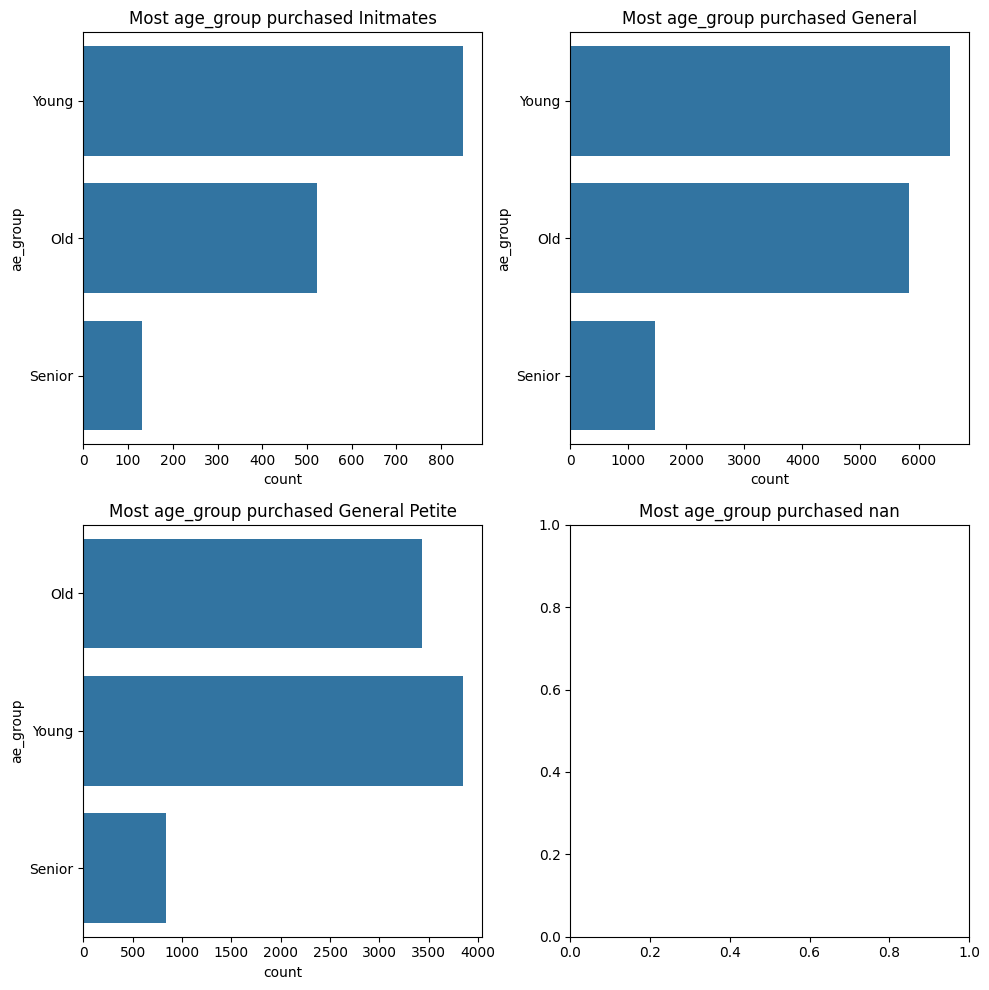

In [110]:
age_g=list(cus["Category"].unique())
c=1
plt.figure(figsize=(10,10))
for i in age_g:
    plt.subplot(2,2,c)
    age=cus[cus["Category"]==i]
    sns.countplot(age["ae_group"])
    plt.title(f"Most age_group purchased {i}")
    c=c+1
plt.tight_layout()
plt.show()
#young group purchase most

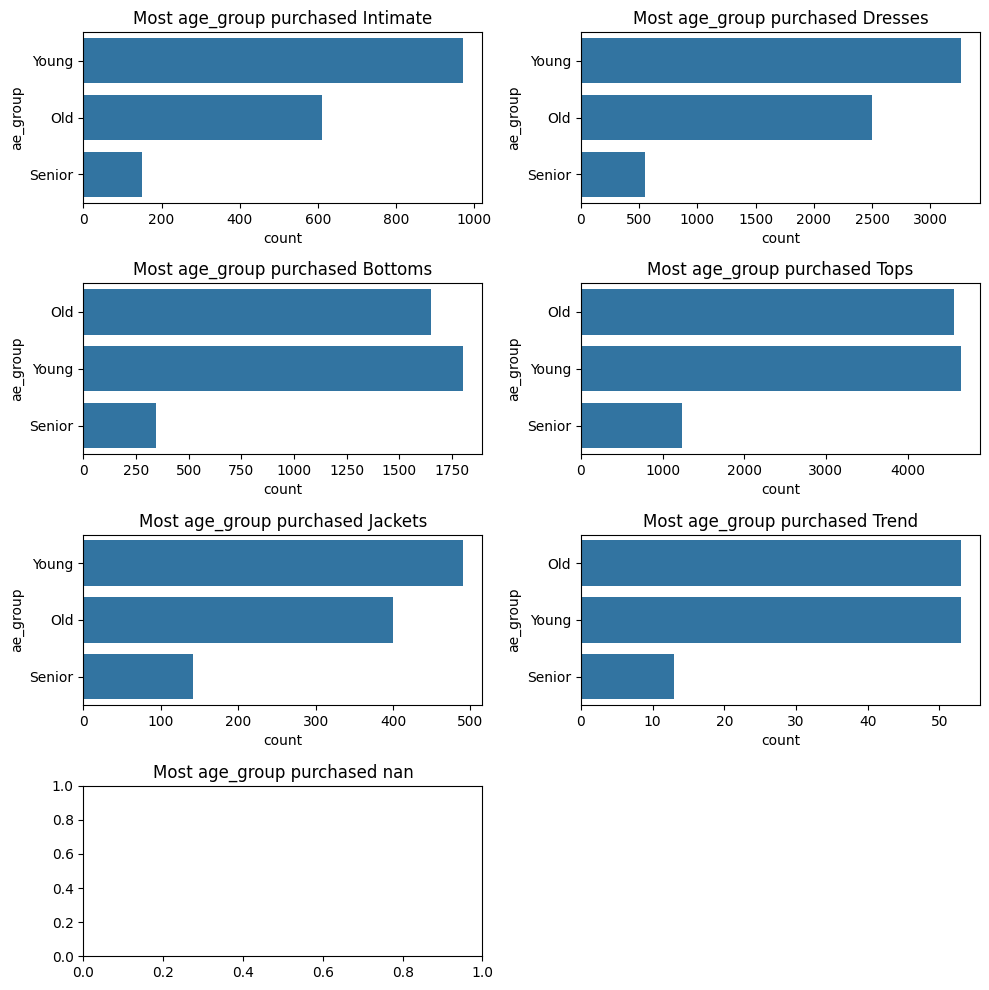

In [114]:
age_g=list(cus["Subcategory1"].unique())
c=1
plt.figure(figsize=(10,10))
for i in age_g:
    plt.subplot(4,2,c)
    age=cus[cus["Subcategory1"]==i]
    sns.countplot(age["ae_group"])
    plt.title(f"Most age_group purchased {i}")
    c=c+1
plt.tight_layout()
plt.show()
#young purchase the most but in some category such as tops and tredn old customer are very close

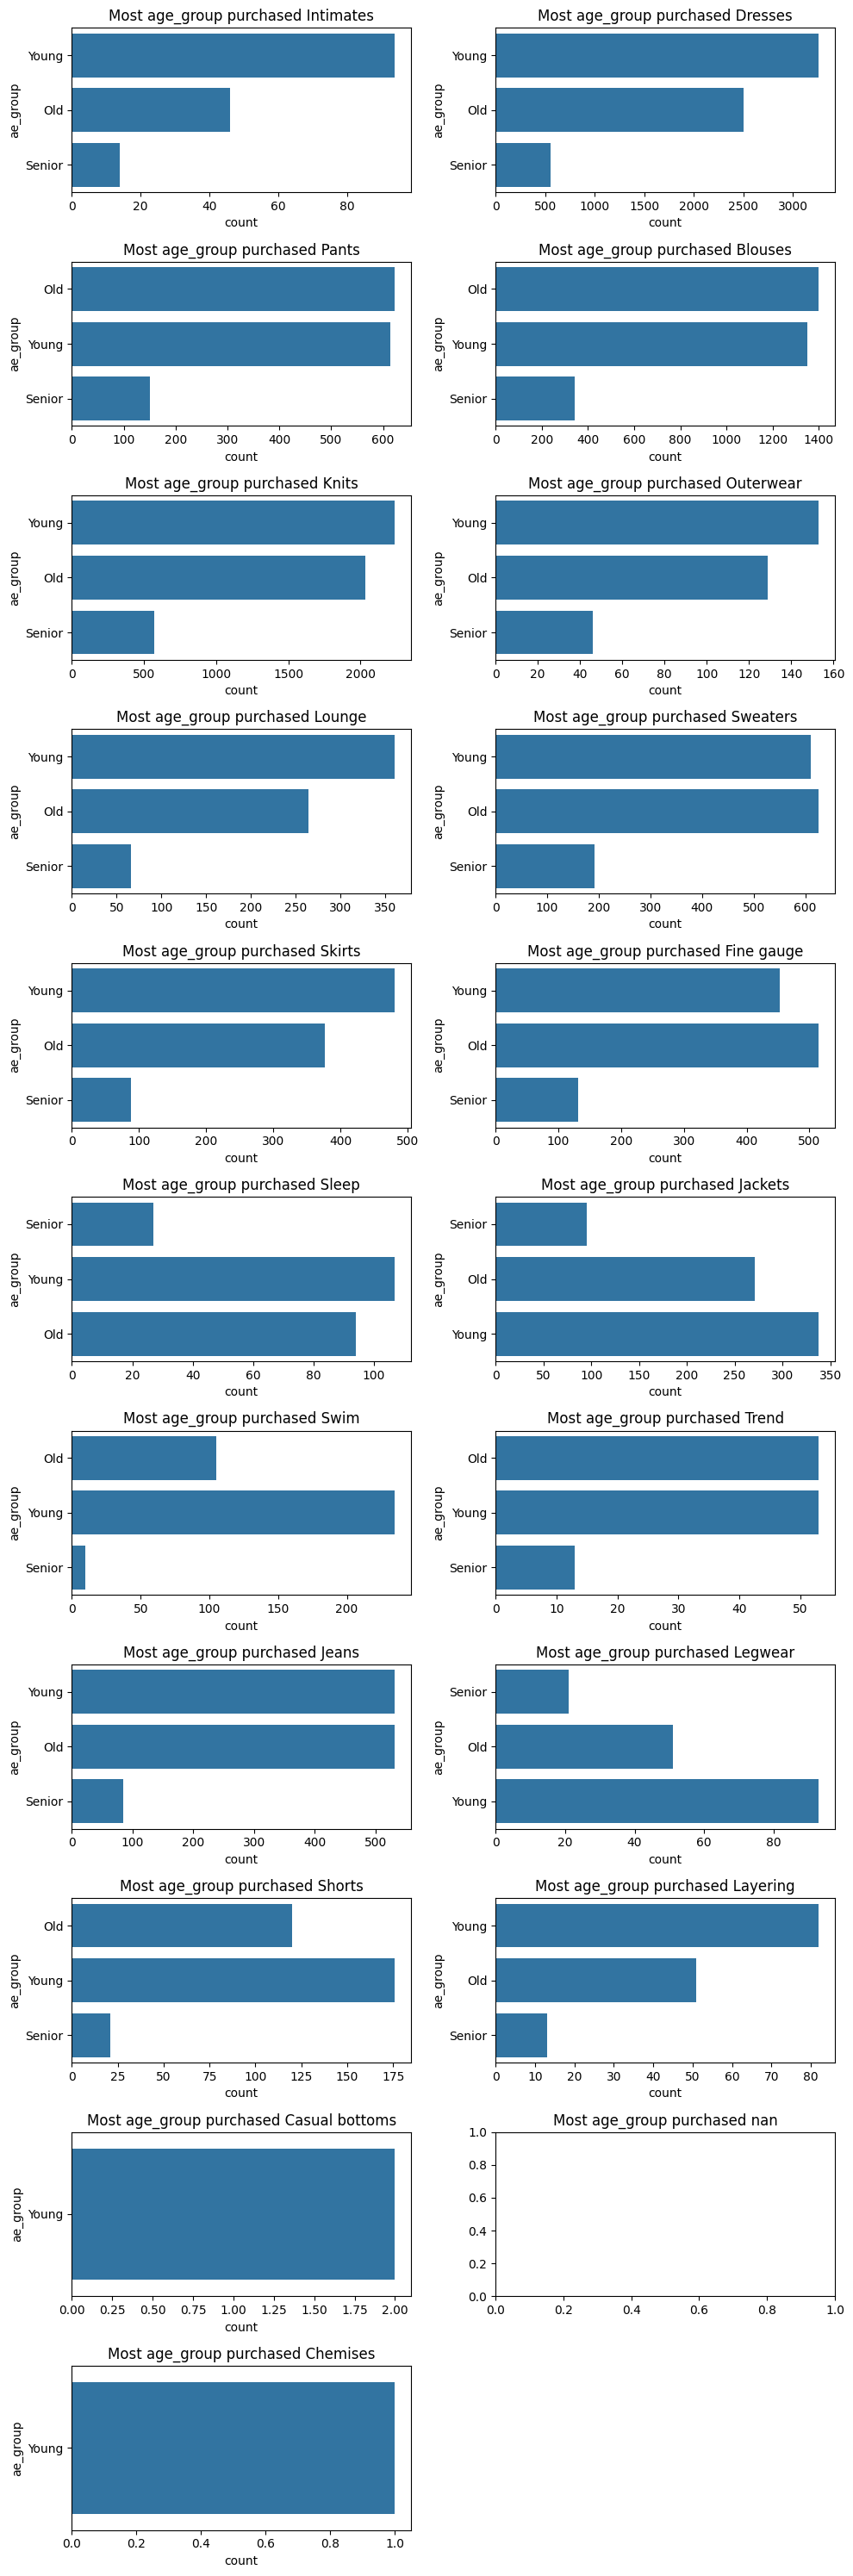

In [123]:
age_g=list(cus["SubCategory2"].unique())
c=1
plt.figure(figsize=(10,30))
for i in age_g:
    plt.subplot(11,2,c)
    age=cus[cus["SubCategory2"]==i]
    sns.countplot(age["ae_group"])
    plt.title(f"Most age_group purchased {i}")
    c=c+1
plt.tight_layout()
plt.show()
#in purchased swater ,fine guage,customer are more old
# in blouse,pants,trend and jeans old and young customer are very close
#in the other all young is more

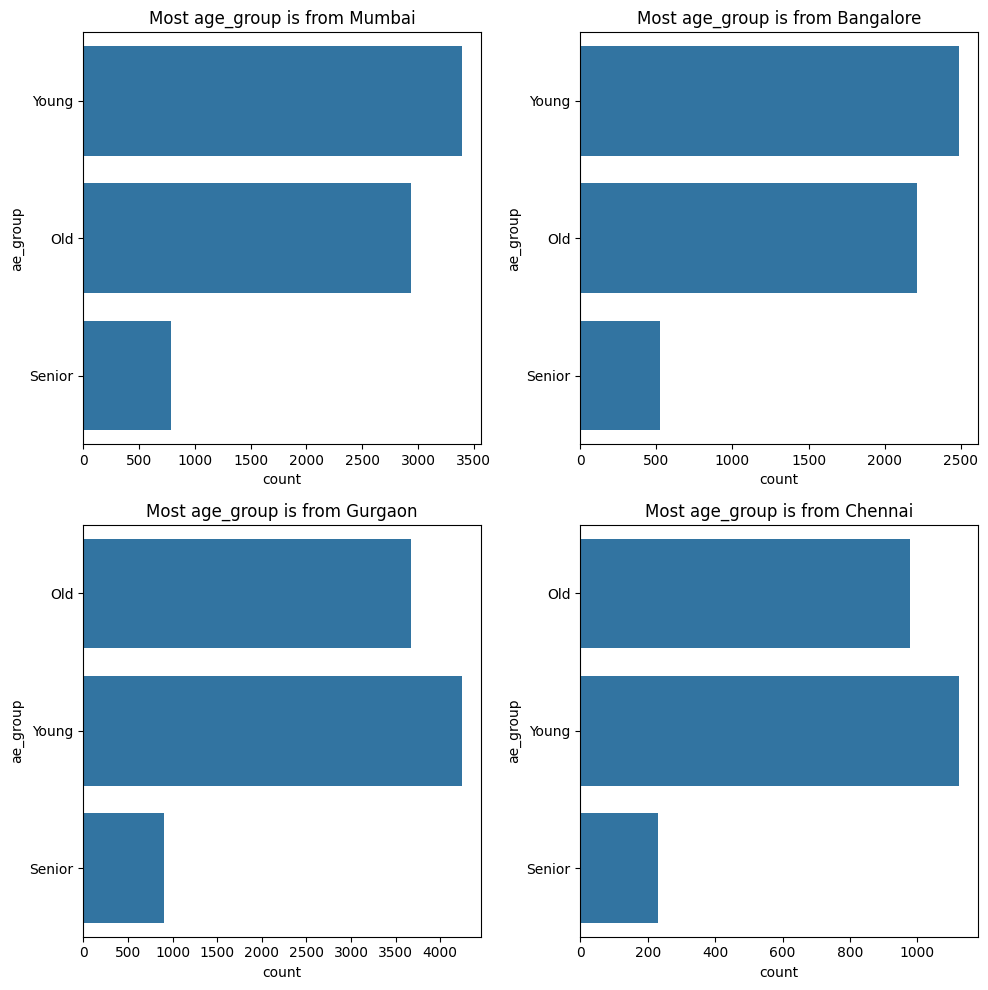

In [125]:
age_g=list(cus["Location"].unique())
c=1
plt.figure(figsize=(10,10))
for i in age_g:
    plt.subplot(2,2,c)
    age=cus[cus["Location"]==i]
    sns.countplot(age["ae_group"])
    plt.title(f"Most age_group is from {i}")
    c=c+1
plt.tight_layout()
plt.show()
#in all location young is the majority customer

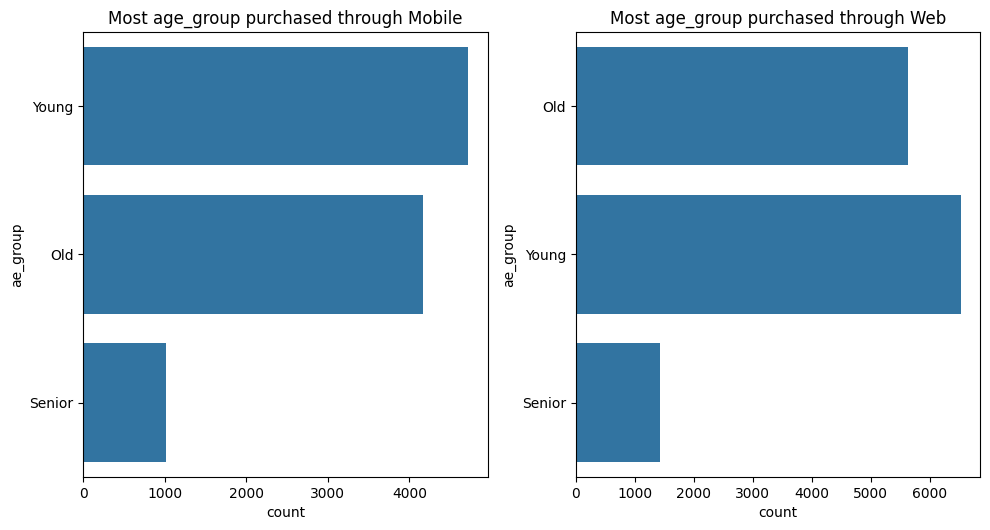

In [127]:
age_g=list(cus["Channel"].unique())
c=1
plt.figure(figsize=(10,10))
for i in age_g:
    plt.subplot(2,2,c)
    age=cus[cus["Channel"]==i]
    sns.countplot(age["ae_group"])
    plt.title(f"Most age_group purchased through {i}")
    c=c+1
plt.tight_layout()
plt.show()
#young uses both channel most

In [129]:
print(cus.groupby("ae_group")["Rating"].mean())
#All age_group gives a average rating of 4

ae_group
Old       4.198102
Senior    4.287238
Young     4.174253
Name: Rating, dtype: float64


In [134]:
print(cus.groupby("ae_group")["Recommend Flag"].mean())
#most of the people will recommend in all age group
# but in young there are more people who will not recommend in comparison of other

ae_group
Old       0.824352
Senior    0.852688
Young     0.814011
Name: Recommend Flag, dtype: float64


In [136]:
print(cus.groupby("Category")["Recommend Flag"].mean())
#most of the category will be recommend
# but in general category  there are more people who will not recommend in comparison of other category

Category
General           0.816810
General Petite    0.825942
Initmates         0.852197
Name: Recommend Flag, dtype: float64


In [140]:
print(cus.groupby("Subcategory1")["Recommend Flag"].mean())
#most of the subcategory1 will be recommend
# trend have very much people who will not recommend it  

Subcategory1
Bottoms     0.851277
Dresses     0.808197
Intimate    0.850144
Jackets     0.836240
Tops        0.815098
Trend       0.739496
Name: Recommend Flag, dtype: float64


In [141]:
print(cus.groupby("SubCategory2")["Recommend Flag"].mean())
#most of the subcategory2 will be recommend
# trend have very much people who will not recommend it 

SubCategory2
Blouses           0.810078
Casual bottoms    1.000000
Chemises          1.000000
Dresses           0.808197
Fine gauge        0.837273
Intimates         0.857143
Jackets           0.845170
Jeans             0.881430
Knits             0.817600
Layering          0.883562
Legwear           0.860606
Lounge            0.859624
Outerwear         0.817073
Pants             0.832853
Shorts            0.839117
Skirts            0.845503
Sleep             0.855263
Sweaters          0.800420
Swim              0.805714
Trend             0.739496
Name: Recommend Flag, dtype: float64


In [144]:
print(cus.groupby("Location")["Recommend Flag"].mean())
#all the location have same recoomendation average

Location
Bangalore    0.821784
Chennai      0.826106
Gurgaon      0.821388
Mumbai       0.822694
Name: Recommend Flag, dtype: float64


In [146]:
print(cus.groupby("Channel")["Recommend Flag"].mean())
#all cahnnel will recommend
#but web have less recommednation then mobile

Channel
Mobile    0.826012
Web       0.819661
Name: Recommend Flag, dtype: float64


In [148]:
import spacy

In [150]:
npl=spacy.load("en_core_web_md")

In [176]:
words=cus[["review","Recommend Flag"]][cus["Review Text"]!=" "]

In [200]:
def st(x):
    wo=["sooo","dress"]
    data=npl(x)
    wor=[]
    for token in data:
        if (token.is_stop==False) and (token.is_alpha) and (token.is_digit==False) and (token.is_punct==False) and (token.text.lower() not in wo):
            wor.append(token.lemma_.lower())
    return " ".join(wor)

In [201]:
words["clean"]=words["review"].apply(st)

In [206]:
from wordcloud import WordCloud

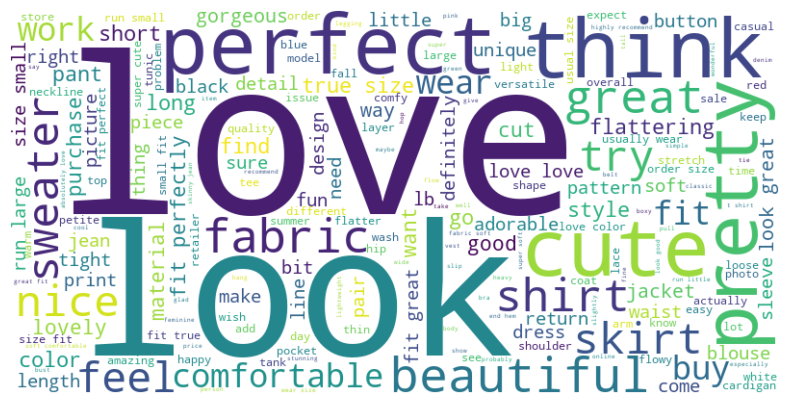

In [210]:
#positive words
pos=words[words["Recommend Flag"]==1]#1 is positive
positive_words=" ".join(pos["clean"])
wc = WordCloud(width=800,height=400,background_color="white").generate(positive_words)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

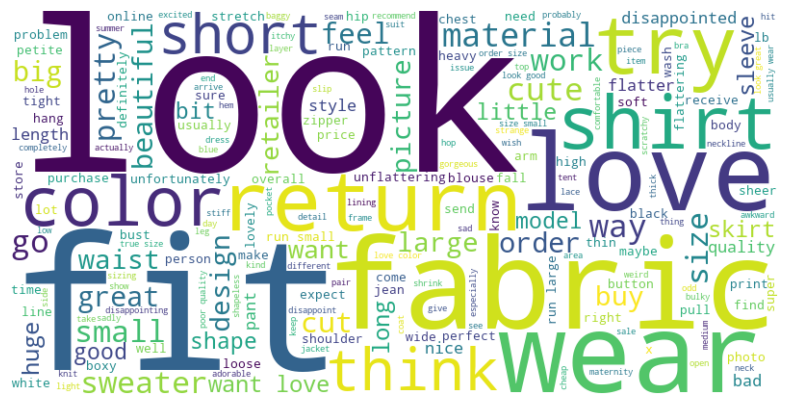

In [209]:
#negative words
#positive words
neg=words[words["Recommend Flag"]==0]#0 is negative
neg_words=" ".join(neg["clean"])
wc = WordCloud(width=800,height=400,background_color="white").generate(neg_words)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [213]:
X_train, X_test, y_train, y_test=train_test_split(words["clean"],words["Recommend Flag"],random_state=42,test_size=0.2)

In [259]:
pipe=Pipeline([
    ("tf",TfidfVectorizer(max_features=8000)),
    ("ran",RandomForestClassifier(class_weight="balanced",random_state=42,max_depth=11,min_samples_leaf=1,min_samples_split=2))
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('tf', TfidfVectorizer(max_features=8000)),
                ('ran',
                 RandomForestClassifier(class_weight='balanced', max_depth=11,
                                        random_state=42))])

In [272]:
pipe1=Pipeline([
    ("tf",TfidfVectorizer(max_features=9000)),
    ("lo",LogisticRegression(random_state=42,class_weight="balanced"))
])
pipe1.fit(X_train,y_train)

Pipeline(steps=[('tf', TfidfVectorizer(max_features=9000)),
                ('lo',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [292]:
pipe2=Pipeline([
    ("tf",TfidfVectorizer(max_features=1000)),
    ("mu",MultinomialNB(alpha=0.5))
])
pipe2.fit(X_train,y_train)

Pipeline(steps=[('tf', TfidfVectorizer(max_features=1000)),
                ('mu', MultinomialNB(alpha=0.5))])

In [295]:
print("Random Fprest")
print(classification_report(y_test,pipe.predict(X_test)))
print("Logestic Regression")
print(classification_report(y_test,pipe1.predict(X_test)))
print("Multi nomia")
print(classification_report(y_test,pipe2.predict(X_test)))

Random Fprest
              precision    recall  f1-score   support

           0       0.55      0.82      0.66       812
           1       0.96      0.86      0.90      3717

    accuracy                           0.85      4529
   macro avg       0.75      0.84      0.78      4529
weighted avg       0.88      0.85      0.86      4529

Logestic Regression
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       812
           1       0.97      0.89      0.93      3717

    accuracy                           0.88      4529
   macro avg       0.80      0.87      0.83      4529
weighted avg       0.91      0.88      0.89      4529

Multi nomia
              precision    recall  f1-score   support

           0       0.88      0.33      0.49       812
           1       0.87      0.99      0.93      3717

    accuracy                           0.87      4529
   macro avg       0.88      0.66      0.71      4529
weighted avg       0.87     